# 시계열분석(Time Series)

* 시간 데이터: 특정한 간격을 갖는 시간 (Lag)
    - Lag에서 Data의 Trend를 찾는 것
* 일변량 정상시계열
    - ARIMA란?

* Trend : 추세
* Seasonality: 계절성
* Cycle : 주기
* Noise : 잡음 -> White Noise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1= pd.read_csv('Data11.csv')
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


(803675, 3)

In [3]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [4]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [5]:
# 구매일 날짜형 데이터로 변환
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [6]:
df1

,구매일,구매금액,물품대분류,Datetime
0,2018-04-20,57120,기저귀,2018-04-20
1,2018-04-20,15900,더블하트,2018-04-20
2,2018-04-20,7000,더블하트,2018-04-20
3,2018-04-20,20900,더블하트,2018-04-20
4,2018-05-06,26500,더블하트,2018-05-06
...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06
803671,2020-08-06,6640,더블하트,2020-08-06
803672,2020-08-06,5600,더블하트,2020-08-06
803673,2020-08-06,7840,더블하트,2020-08-06


In [7]:
df1['Datetime'].describe()

C:\Users\Sanghyun Yun\AppData\Local\Temp\ipykernel_25352\3062964908.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [8]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

C:\Users\Sanghyun Yun\AppData\Local\Temp\ipykernel_25352\4003803344.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['week'] = df1['Datetime'].dt.week


In [9]:
df1

,구매일,구매금액,물품대분류,Datetime,Year,Month,week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday
...,...,...,...,...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06,2020,8,32,Thursday
803671,2020-08-06,6640,더블하트,2020-08-06,2020,8,32,Thursday
803672,2020-08-06,5600,더블하트,2020-08-06,2020,8,32,Thursday
803673,2020-08-06,7840,더블하트,2020-08-06,2020,8,32,Thursday


In [10]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

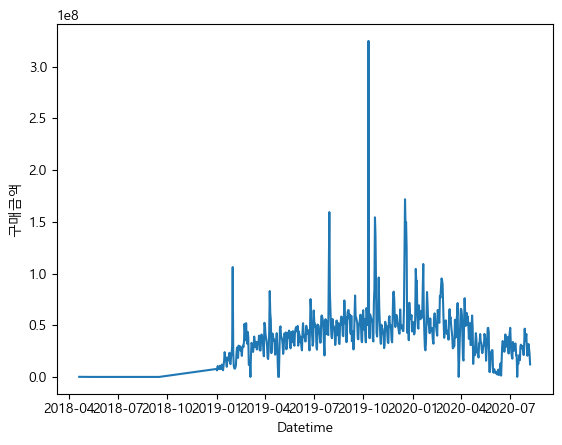

In [11]:
# 일별 구매금액 평균
sns.lineplot(data=df1, x='Datetime', y='구매금액', ci=None, estimator=sum)

In [12]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

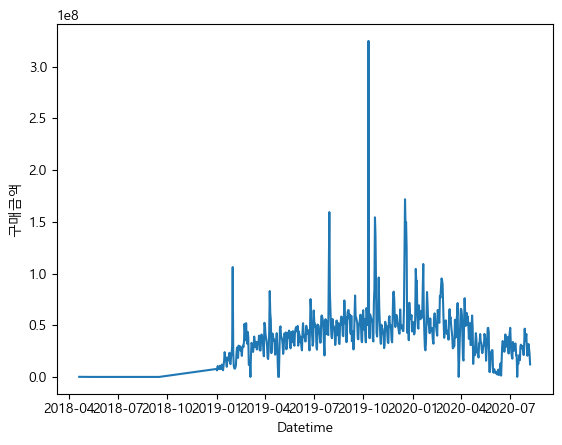

In [13]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [14]:
p2 = pd.pivot_table(data=df1, index=['Datetime', '물품대분류'], values='구매금액', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

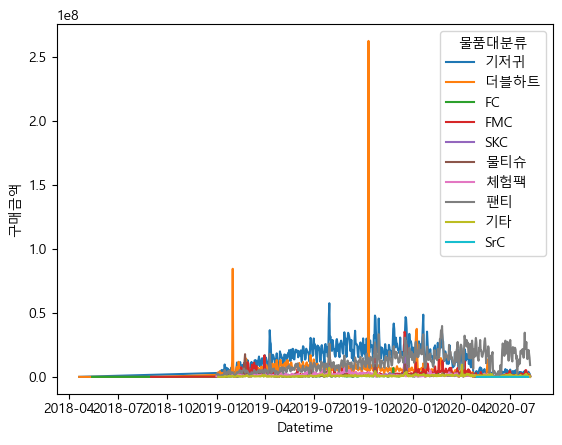

In [15]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

시계열 분석이란 이전에 일어났던 일들이 다음 일어날 시간에 무슨 영향을 줄까?

In [16]:
cond1 = (df1['물품대분류']=='기저귀')
df2= df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


* ARIMA (Auto Regressive Integrated Moving Average Model)

* AR (Auto Regressive Model): 자기회귀모델
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - ACF(Auto Correlation Function): 자기상관함수 / 특정 구간내 데이터간 상관관계
    - PACF(Partial Auto Correlation Function): 부분자기상관함수
    
* MA (Moving Average Model): 이동 평균 모델
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델 (불규칙적인 변동 제거 가능)
    - 불규칙적인 변동? 월요일에는 매출이 좋았는데, 수요일은 매출이 좋지 않았음. 그런거를 일주일 평균을 계산해서 좀 평준화를 시키는 것.

* Difference: 차분 (정상적인 데이터로 만들어주는 작업)

** ARIMA Model**

- 단기예측에 적합
- 계절적 변동요인 (주기적 변동)
- Sample > 50개 이상인 경우
- 정성적자료 
    -> 차분  (분산이 증가하거나 감소할 때 사용)

In [17]:
import statsmodels.tsa.api as tsa

In [18]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [19]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [20]:
df_time2 = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum').reset_index()
df_time2.set_index('Datetime') # index를 Datetime에 지정해줘야 한다.

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [43]:
# 일주일 단위로 묶기
y = df_time['구매금액'].resample('1W').mean() # 구매금액 일주일 단위로 평균값을 구함
# y = df_time['구매금액'].resample('1D').mean() # 구매금액 하루 단위로 평균값을 구함

In [44]:
y.isnull().sum()

0

In [45]:
y1 =y.fillna( y.mean()) # 이전날의 값을 대체값으로 채울수도 있음 공백이 있을 시
# methods='ffill' (forwardfill) 다음값을 채워넣음
# methods='bfill' (backwardfill) 이전 값을 채워넣음

In [46]:
y1

Datetime
2019-01-06    2.828300e+06
2019-01-13    4.169337e+06
2019-01-20    6.073960e+06
2019-01-27    5.244731e+06
2019-02-03    5.910783e+06
                  ...     
2020-07-12    3.690429e+06
2020-07-19    2.270883e+06
2020-07-26    3.211271e+06
2020-08-02    3.072586e+06
2020-08-09    2.738640e+06
Freq: W-SUN, Name: 구매금액, Length: 84, dtype: float64

* 시계열 분해
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle/Residual (불규칙 또는 순환 요인)

In [47]:
y2 = y.fillna(method='ffill')

In [48]:
y2

Datetime
2019-01-06    2.828300e+06
2019-01-13    4.169337e+06
2019-01-20    6.073960e+06
2019-01-27    5.244731e+06
2019-02-03    5.910783e+06
                  ...     
2020-07-12    3.690429e+06
2020-07-19    2.270883e+06
2020-07-26    3.211271e+06
2020-08-02    3.072586e+06
2020-08-09    2.738640e+06
Freq: W-SUN, Name: 구매금액, Length: 84, dtype: float64

In [27]:
# 그래프의 사이즈를 조정해주는 함수
from pylab import rcParams

In [28]:
rcParams['figure.figsize']=15, 10
#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

C:\Users\Sanghyun Yun\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\Sanghyun Yun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


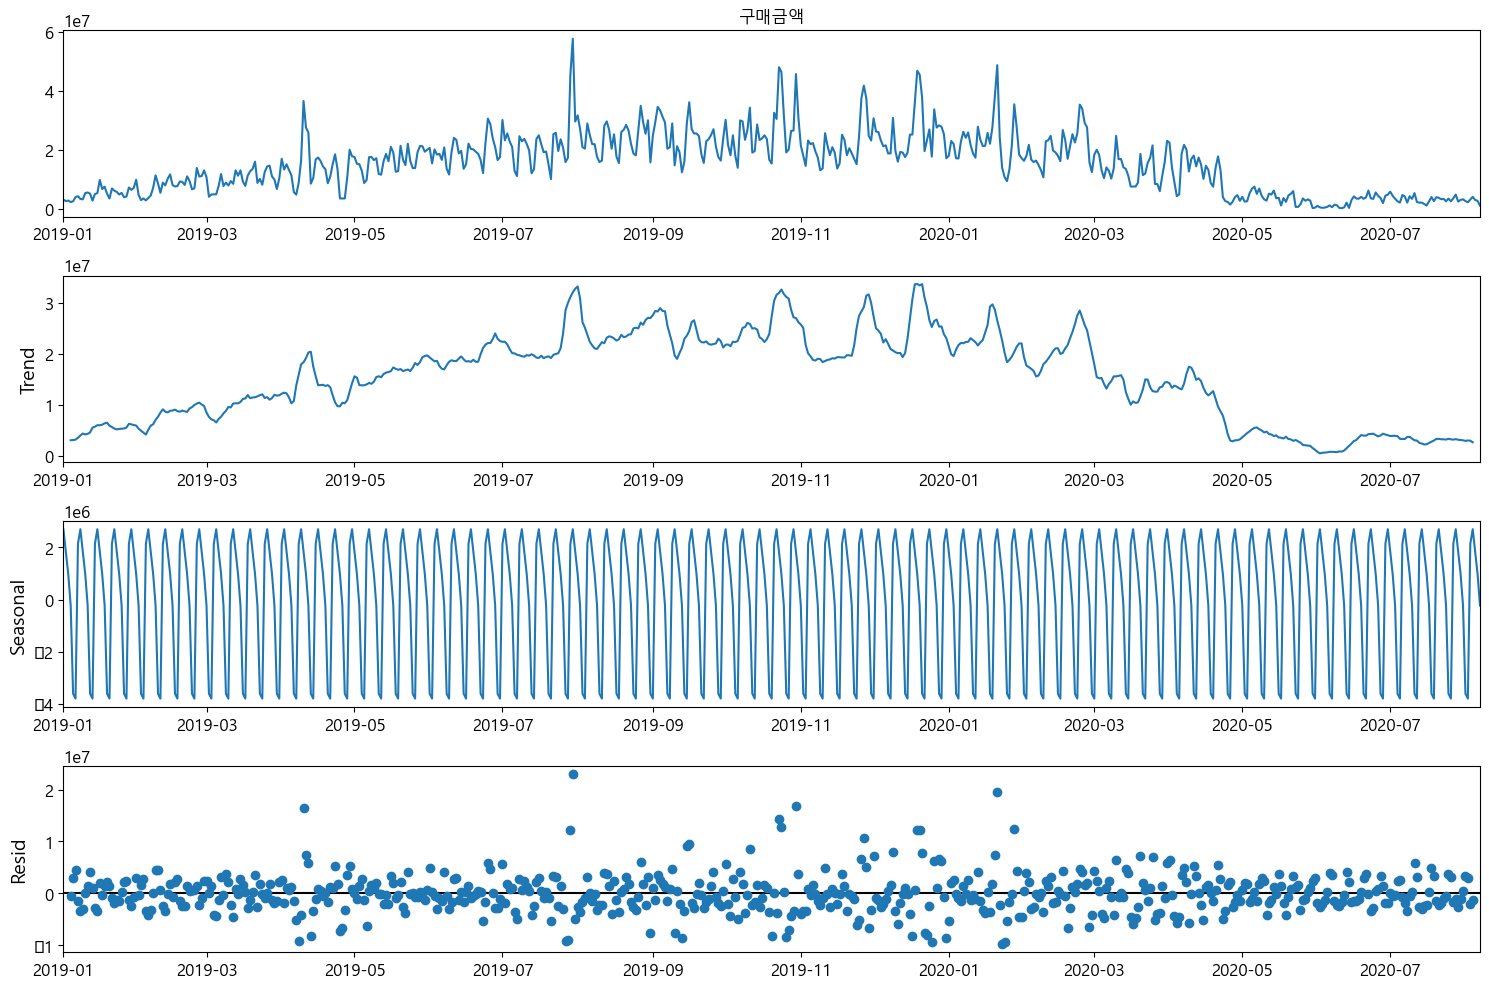

In [29]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y2,model='additive') #tsa.seasonal_decompse = 시계열 분석

#모델 시각화
fig = model_series.plot()
plt.show()

In [30]:
import itertools # 반복수를 만드는 라이브러리 

In [31]:
p = d = q = range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [32]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [33]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
param_list = []
param_seasonal_list = []
results_AIC_list=[]

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1, order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results=mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [36]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

**Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
   -특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
   
- **AIC (Akaike Information Criterion): 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 In(L) + 2k
    - 값이 낮을 수록 모형 적합돡 높은 것을 의미
- **BIC(Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
    
- **HQIC(Hanna Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))
    

In [37]:
ARIMA_list.sort_values(by='AIC') #AIC 값이 낮을수록 변동이 없고 정확하다.

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",19010.491330
43,"(1, 0, 1)","(0, 1, 1, 12)",19010.818978
63,"(1, 1, 1)","(1, 1, 1, 12)",19031.248036
59,"(1, 1, 1)","(0, 1, 1, 12)",19031.699882
23,"(0, 1, 0)","(1, 1, 1, 12)",19034.816136
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",20255.210439
12,"(0, 0, 1)","(1, 0, 0, 12)",20266.787901
1,"(0, 0, 0)","(0, 0, 1, 12)",20488.803502
8,"(0, 0, 1)","(0, 0, 0, 12)",20757.354541


In [38]:
mod = tsa.statespace.SARIMAX(y2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9521.297
Date:                            Tue, 30 Jan 2024   AIC                          19048.594
Time:                                    20:19:39   BIC                          19061.567
Sample:                                01-01-2019   HQIC                         19053.660
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.063     -1.137      0.256      -0.196       0.052
ma.S.L12      -0.9948      0.022   

Order (p,d,q), Seasonal Order(P,D,Q,M)
    -p: AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    -d: 차분
    -q: q MA PACF 편상관계수 q 값
    -P: 계절성 주기에서의 패턴이 어떻게 되어있는가
    -D: 계절성의 여부(있는가 없는가?) 1 or 0 로 표현됨
    -Q: 주기에 패턴이나 계절성이 얼마나 반복되는지에 대한 횟수를 나타냄
    -M: 계절성 주기가 어떻게 되는가?

- Ljung - Box Test: 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
    -귀무: 데이터가 상관관계를 나타내지 않는다. 
    -대립: 데이터가 상관관계를 나타낸다. (상관계수가 0이 아니다)
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참

- Jarque Bera Test: 왜도와 첨도가 정규분포와 일치하는지 가설검정
    - SARIMAX: 잔차의 분포가 정규분포인가
    - 귀무 가설: 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설: 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05, 해당 잔차(residual)는 정규분포와 일치하지 않는다.

- Heteroskedasticity (H): 잔차의 분산이 같은가 다른가?


C:\Users\Sanghyun Yun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


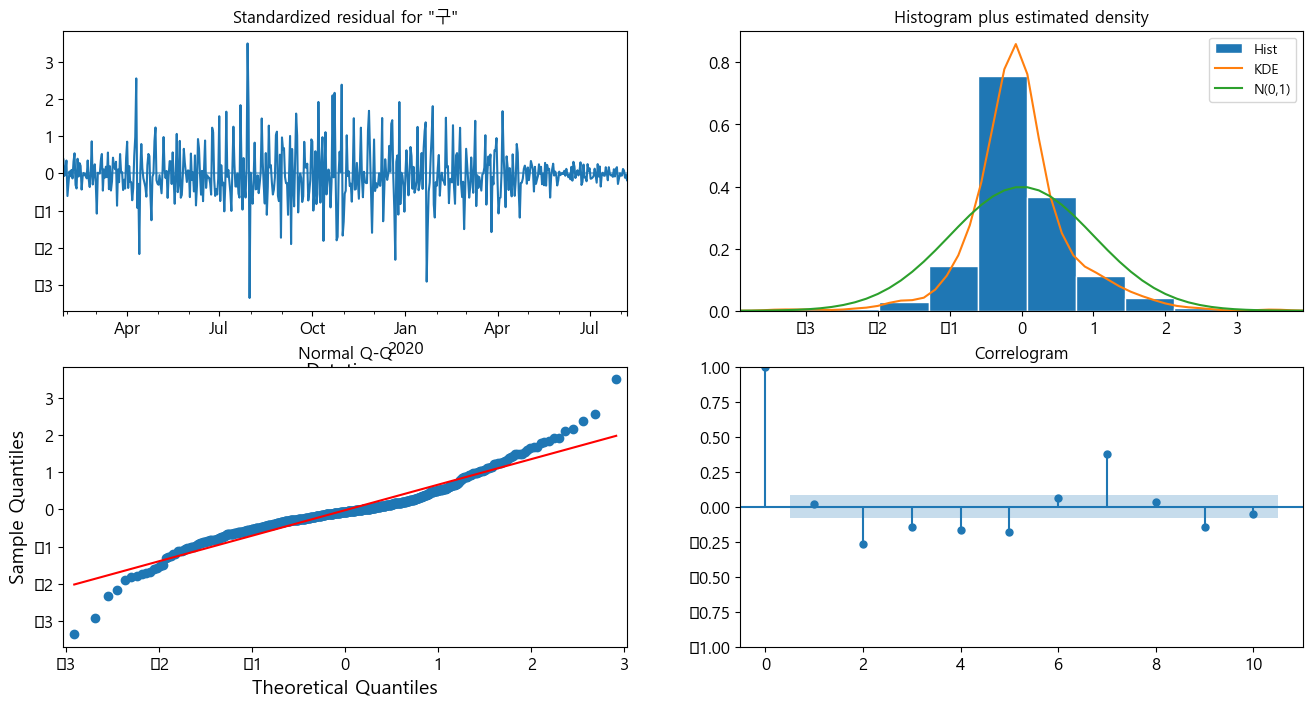

In [39]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [40]:
results.get_prediction()

In [41]:
y2.head()

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
Freq: D, Name: 구매금액, dtype: float64

C:\Users\Sanghyun Yun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


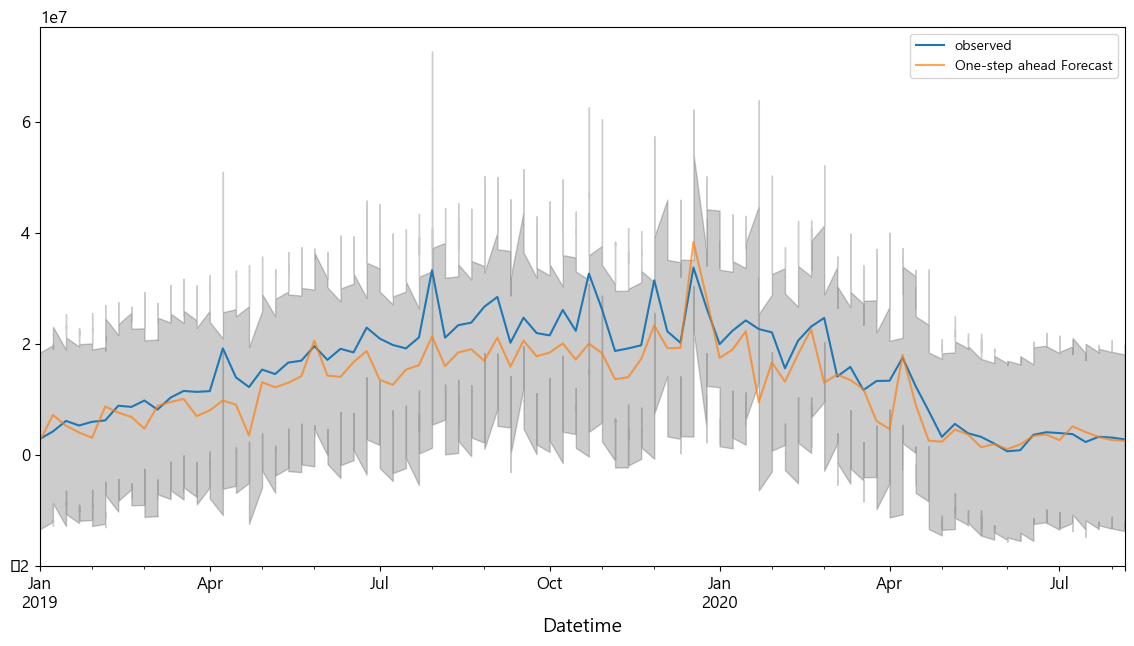

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,2019-01-06,2.463865e+06
1,2019-01-07,3.811048e+06
2,2019-01-08,4.189487e+06
3,2019-01-09,3.347997e+06
4,2019-01-10,3.155918e+06
...,...,...
575,2020-08-03,2.119589e+06
576,2020-08-04,3.389947e+06
577,2020-08-05,3.888284e+06
578,2020-08-06,2.957047e+06


In [58]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-06':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 23416340142852.34


In [59]:
pred_uc = results.get_forecast(steps=50)

In [60]:
pred_uc.predicted_mean

2020-08-08    1.153399e+06
2020-08-09    1.111748e+06
2020-08-10    1.145239e+06
2020-08-11    2.646961e+06
2020-08-12    2.767043e+06
2020-08-13    2.641908e+06
2020-08-14    2.658703e+06
2020-08-15    2.604092e+06
2020-08-16    2.989954e+06
2020-08-17    2.907517e+06
2020-08-18    2.856994e+06
2020-08-19    2.684292e+06
2020-08-20    2.709143e+06
2020-08-21    2.667492e+06
2020-08-22    2.700983e+06
2020-08-23    4.202705e+06
2020-08-24    4.322787e+06
2020-08-25    4.197652e+06
2020-08-26    4.214447e+06
2020-08-27    4.159836e+06
2020-08-28    4.545698e+06
2020-08-29    4.463261e+06
2020-08-30    4.412738e+06
2020-08-31    4.240036e+06
2020-09-01    4.264887e+06
2020-09-02    4.223236e+06
2020-09-03    4.256727e+06
2020-09-04    5.758449e+06
2020-09-05    5.878531e+06
2020-09-06    5.753396e+06
2020-09-07    5.770191e+06
2020-09-08    5.715580e+06
2020-09-09    6.101442e+06
2020-09-10    6.019005e+06
2020-09-11    5.968482e+06
2020-09-12    5.795780e+06
2020-09-13    5.820631e+06
2

C:\Users\Sanghyun Yun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


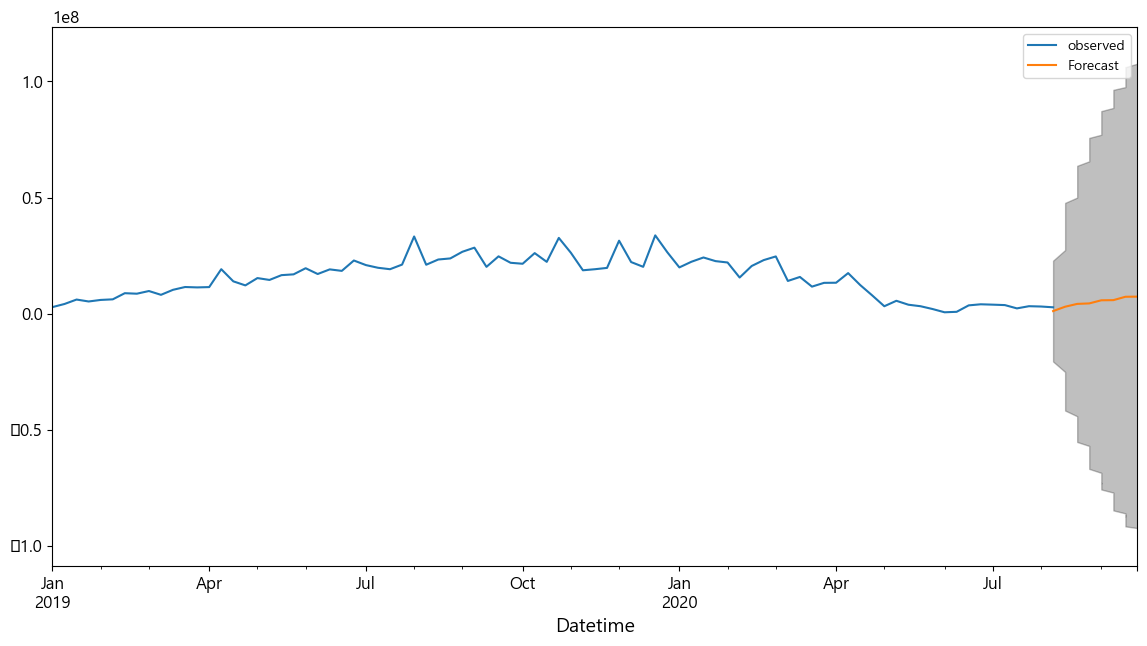

In [54]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [61]:
print('Done')

Done
